# **1. Descripción del problema**
La base de este problema se basa en hacer una exploración de los datos basados en los contagios de Dengue en dos ciudades (San Juan e Iquitos) a través de ciertos datos meteorológicos proporcionados por una competición en la plataforma DrivenData. 

Los datos que tendremos en este dataset simplemente nos vienen a decir que en X ciudad y en Y fecha habían ciertas ciertas condiciones meteorológicas. Primero haremos un estudio para hacer una selección de características ya que en este problema hay 20 variables y posteriormente procederemos a realizar diversas técnicas de clustering con las variables anteriores que hayamos seleccionado.

Con este estudio nos basaremos en, como ya comentaba, seleccionar características, detectar ciertos elementos atípicos (outliers) y finalmente detectar y analizar los grupos de elementos similares que obtendremos tras la aplicación de las diferentes técnicas de clustering utilizadas.

# **2. Técnicas utilizadas**


### 1. Selección de características
* Análisis de correlaciones
* Análisis de Componentes Principales (ACP)
* Clustering Jerárquico
* DBSCAN

### 2. Clustering de elementos
* Análisis de Componentes Principales (ACP)
* Clustering Jerárquico
* K-Means
* DBSCAN



# **3. Resolución del problema**

## Cargando datos y librerías

In [0]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D

from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

from sklearn import preprocessing 
from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import KMeans

from scipy import cluster

In [0]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    #columnas = ['Ciudad','Año','SemanaDelAño','ComienzoSemana', 'PixelNorEsteCentroideCiudad', 'PixelNorOesteCentroideCiudad', 'PixelSurEsteCentroideCiudad', 'PixelSurOesteCentroideCiudad', 'TotalPrecipitacionesMM', 'MediaTempAire', 'PromedioTempAire', 'TempMediaSereno', 'MaxTempAire', 'MinTempAire', 'TotalPrecipitationKgPerM2', 'MediaHumedadRelativa', 'TotalPrecipitacionMMSat', 'MediaHumedadEspecificaGperKg', 'RangoTempDia', 'MediaTemp', 'RangoTempDia2', 'MaxTemp', 'MinTemp', 'TotalPrecipitation']
    data = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields, header=0, parse_dates=[3])
    return data

In [270]:
train = upload_files(['city', 'weekofyear', 'year'])
train.head()

Saving dengue_features_train.csv to dengue_features_train (2).csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


week_start_date  ...  station_precip_mm
city weekofyear year                  ...                   
sj   18         1990      1990-04-30  ...               16.0
     19         1990      1990-05-07  ...                8.6
     20         1990      1990-05-14  ...               41.4
     21         1990      1990-05-21  ...                4.0
     22         1990      1990-05-28  ...                5.8

[5 rows x 21 columns]

In [271]:
train.shape

(1456, 21)

In [272]:
train.dtypes

week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           float64
reanalysis_tdtr_k                               float64
station_avg_temp_c                              float64
station_diur_temp_rng_c                         

In [273]:
train.drop("week_start_date", axis = 1, inplace = True)
train.head()

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
city weekofyear year                      ...                                       
sj   18         1990  0.122600  0.103725  ...                20.0               16.0
     19         1990  0.169900  0.142175  ...                22.2                8.6
     20         1990  0.032250  0.172967  ...                22.8               41.4
     21         1990  0.128633  0.245067  ...                23.3                4.0
     22         1990  0.196200  0.262200  ...                23.9                5.8

[5 rows x 20 columns]

In [274]:
dsc = train.describe()
dsc

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [275]:
pd.isnull(train).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

In [276]:
# ffill: propagate last valid observation forward to next valid backfill
train.fillna(method='ffill', inplace=True)
pd.isnull(train).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

## Selección de características

### Análisis de correlaciones

In [277]:
df_feat = transpose(train)
df_feat

city                                           sj  ...          iq
weekofyear                                     18  ...          25
year                                         1990  ...        2010
ndvi_ne                                  0.122600  ...    0.298186
ndvi_nw                                  0.103725  ...    0.232971
ndvi_se                                  0.198483  ...    0.274214
ndvi_sw                                  0.177617  ...    0.315757
precipitation_amt_mm                    12.420000  ...   63.220000
reanalysis_air_temp_k                  297.572857  ...  298.097143
reanalysis_avg_temp_k                  297.742857  ...  299.835714
reanalysis_dew_point_temp_k            292.414286  ...  295.807143
reanalysis_max_air_temp_k              299.800000  ...  307.800000
reanalysis_min_air_temp_k              295.900000  ...  292.300000
reanalysis_precip_amt_kg_per_m2         32.000000  ...   36.900000
reanalysis_relative_humidity_percent    73.365714  ...   89.082857
reanalysis_sat_precip_amt_mm            12.420000  ...   63.220000
reanalysis_specific_humidity_g_per_kg   14.012857  ...   17.355714
reanalysis_tdtr_k                        2.628571  ...   11.014286
station_avg_temp_c                      25.442857  ...   27.475000
station_diur_temp_rng_c                  6.900000  ...    9.900000
station_max_temp_c                      29.400000  ...   33.700000
station_min_temp_c                      20.000000  ...   22.200000
station_precip_mm                       16.000000  ...   20.400000

[20 rows x 1456 columns]

In [279]:
names =  df_feat.index
names

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

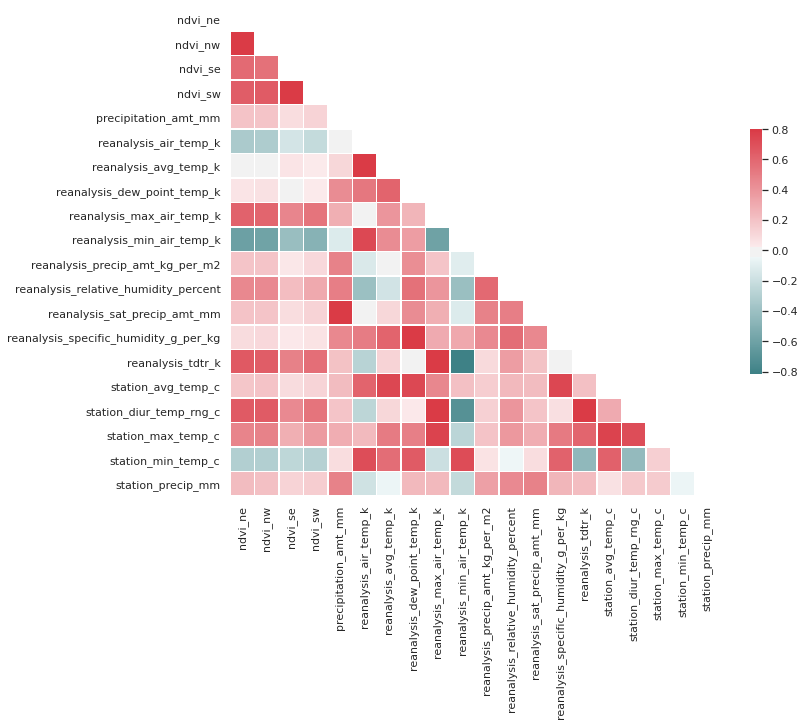

In [280]:
R = corrcoef(df_feat)

# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


Como podemos observar, hay variables que están más correlacionadas entre sí pero la mayoría no están muy correlacionadas. Por ello vamos a hacer uso de otras técnicas para así sacar mejores conclusiones.

### Análisis de Componentes Principales (ACP)

In [286]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)

#1.2. Principal Component Analysis
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 

Variance Ratio:  [0.97883602 0.01292526]


Una vez aplicamos componentes principales a nuestras variables, observamos que el estimador nos da una varianza de los datos en una sola componente del 0.978% y por lo tanto podríamos hacer uso de una sola dimensión para seleccionar variables pero considero más oportuno en la mayoría de los casos el uso de dos dimensiones e incluso 3 para poder observar mejor en el espacio como están situadas nuestras características.

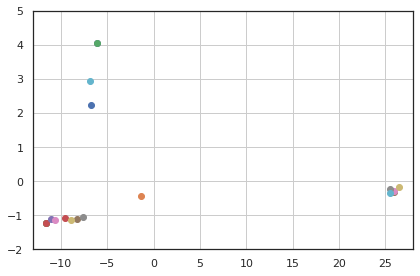

In [287]:
fig, ax = plt.subplots()
for i in range(len(X_pca)):
  #plt.text(0, X_pca[i,0], names[i]) 
  plt.scatter(X_pca[i,0],X_pca[i,1])

plt.ylim(-2, 5)
plt.xlim(-13, 28)
ax.grid(True)
fig.tight_layout()
plt.show()

Antes de realizar otro análisis, a simple vista podemos observar un grupo a la derecha del gráfico, 1 o 2 grupos en la esquina inferior izquierda del gráfico (según el criterio de cada uno) y 5 outliers (en el punto verde de arriba hay dos puntos superpuestos ya que los datos de ambas características son exactamente los mismos). Con este análisis por encima continuaremos con el clustering jerárquico para seguir sacando conclusiones y terminar seleccionando las características, a priori, más adecuadas para resolver nuestro problema.

In [288]:
d = {'PC-1': X_pca[:,0], 'PC-2': X_pca[:,1]}
pd.DataFrame(data = d, index=names)

,PC-1,PC-2
ndvi_ne,-11.613513,-1.220111
ndvi_nw,-11.613861,-1.220872
ndvi_se,-11.604322,-1.223141
ndvi_sw,-11.604444,-1.222477
precipitation_amt_mm,-6.071862,4.060145
reanalysis_air_temp_k,25.903499,-0.311529
reanalysis_avg_temp_k,25.967273,-0.286730
reanalysis_dew_point_temp_k,25.465361,-0.219084
reanalysis_max_air_temp_k,26.484103,-0.159538
reanalysis_min_air_temp_k,25.534497,-0.360352


### Clustering Jerárquico

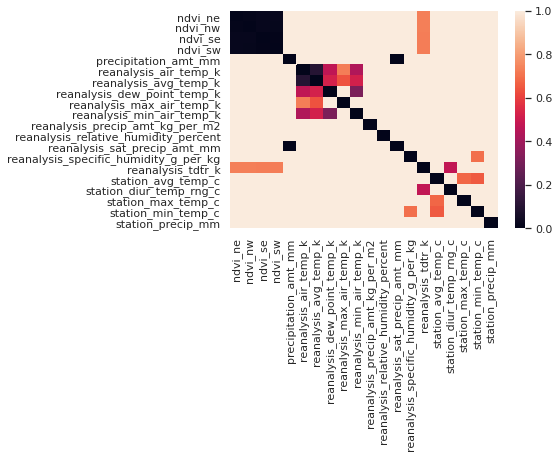

In [289]:
# 2. Compute the similarity matrix
#http://docs.scipy.org/doc/scipy/reference/cluster.html
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)

# 3.1.1 Visualization
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

Con esta matriz de distancias podemos observar que hay 4 variables que son bastante parecidas entre ellas pero considero que es algo bastante normal ya que son variables referidas a los píxeles del centroide de la ciudad pero, en general no hay mucha similitud entre variables salvo ciertas parejas. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


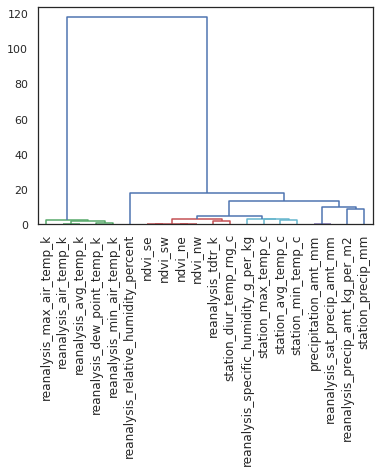

In [290]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)
plt.show()

Una vez pintado el dendograma single link podemos observar lo que comentábamos anteriormente, reanalysis_relative_humidity_percent lo detecta como outlier y a la derecha detecta un pequeño grupo pero lo detecta un poco raro por lo que tiene la pinta de que son esas 4 variables que comentábamos antes que están un poco separadas del resto.
Por lo tanto, considero que debo cortar en torno a 10 ya que como había comentado antes observo 3-4 grupos.

In [291]:
cut = 10 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 3, 4, 3, 2, 2, 2, 2, 2, 2, 3],
      dtype=int32)

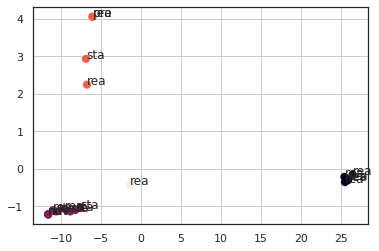

In [292]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 

plt.grid()
plt.show()

Por último realizaremos DBSCAN, técnica que nos va a ayudar bastante para detectar outliers en estas variables ya que es prácticamente lo que estamos buscando, variables diferentes y eliminar esas características que se parecen mucho y que más que aportar están estorbando al modelo.

### DBSCAN

He establecido el mínimo de puntos en 3 ya que al haber solamente 20 características considero que a una zona densa no se le puede pedir más que 3-4 variables y 2 me parecen muy pocas.

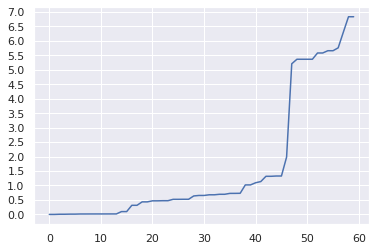

In [297]:
minPts=3
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 70, 10))
ax.set_yticks(np.arange(0, 8, 0.5))

plt.plot(seq)


plt.show()

Una vez hemos obtenido este gráfico debemos fijarnos en el codo, aunque en este caso ha salido un poco raro el gráfico y vamos a optar por probar clusters desde 0.5 a 2.0 con intervalos de 0.2.

In [298]:
for eps in np.arange(0.5, 2.0, 0.2):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  

  0.50, 2, 12
  0.70, 3, 7
  0.90, 3, 5
  1.10, 3, 5
  1.30, 2, 5
  1.50, 2, 5
  1.70, 2, 5
  1.90, 2, 5


In [299]:
db = DBSCAN(eps=1.1, min_samples=minPts).fit(features_norm)
labels = db.labels_
labels

array([ 0,  0,  0,  0, -1,  1,  1,  1,  1,  1, -1, -1, -1,  2,  0,  2,  0,
        2,  2, -1])

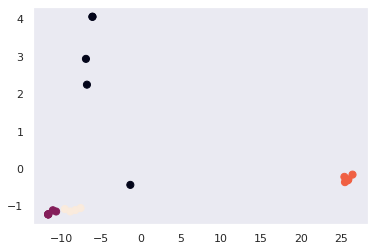

In [300]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
#for i in range(len(X_pca)):
#    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 
plt.grid()
plt.show()

#### Outliers

In [302]:
df_feat['dbscan_group'] = labels

df_feat[df_feat['dbscan_group'] == -1]

city                                         sj  ... dbscan_group
weekofyear                                   18  ...             
year                                       1990  ...             
precipitation_amt_mm                  12.420000  ...           -1
reanalysis_precip_amt_kg_per_m2       32.000000  ...           -1
reanalysis_relative_humidity_percent  73.365714  ...           -1
reanalysis_sat_precip_amt_mm          12.420000  ...           -1
station_precip_mm                     16.000000  ...           -1

[5 rows x 1457 columns]

#### Grupo 1

In [303]:
df_feat['dbscan_group'] = labels

df_feat[df_feat['dbscan_group'] == 0]

city                           sj            ...         iq dbscan_group
weekofyear                     18        19  ...         25             
year                         1990      1990  ...       2010             
ndvi_ne                  0.122600  0.169900  ...   0.298186            0
ndvi_nw                  0.103725  0.142175  ...   0.232971            0
ndvi_se                  0.198483  0.162357  ...   0.274214            0
ndvi_sw                  0.177617  0.155486  ...   0.315757            0
reanalysis_tdtr_k        2.628571  2.371429  ...  11.014286            0
station_diur_temp_rng_c  6.900000  6.371429  ...   9.900000            0

[6 rows x 1457 columns]

#### Grupo 2

In [304]:
df_feat['dbscan_group'] = labels

df_feat[df_feat['dbscan_group'] == 1]

city                                 sj              ...          iq dbscan_group
weekofyear                           18          19  ...          25             
year                               1990        1990  ...        2010             
reanalysis_air_temp_k        297.572857  298.211429  ...  298.097143            1
reanalysis_avg_temp_k        297.742857  298.442857  ...  299.835714            1
reanalysis_dew_point_temp_k  292.414286  293.951429  ...  295.807143            1
reanalysis_max_air_temp_k    299.800000  300.900000  ...  307.800000            1
reanalysis_min_air_temp_k    295.900000  296.400000  ...  292.300000            1

[5 rows x 1457 columns]

#### Grupo 3

In [305]:
df_feat['dbscan_group'] = labels

df_feat[df_feat['dbscan_group'] == 2]

city                                          sj  ... dbscan_group
weekofyear                                    18  ...             
year                                        1990  ...             
reanalysis_specific_humidity_g_per_kg  14.012857  ...            2
station_avg_temp_c                     25.442857  ...            2
station_max_temp_c                     29.400000  ...            2
station_min_temp_c                     20.000000  ...            2

[4 rows x 1457 columns]

De los 5 outliers nos quedaremos con 4 ya que como habíamos comentado habían 2 características que tenían exactamente los mismos datos (precipitation_amt_mm y reanalysis_sat_precip_amt_mm). Y de cada grupo nos quedaremos con 1 variable que hará referencia al grupo en el que están. Por lo que las variables seleccionadas son:

- precipitation_amt_mm
- reanalysis_precip_amt_kg_per_m2
- reanalysis_relative_himidity_percent
- station_precip_mm
- reanalysis_tdtr_k
- reanalysis_air_temp_k
- reanalysis_specific_humidity_g_per_kg

In [0]:
train2 = train[['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'station_precip_mm', 'reanalysis_tdtr_k', 'reanalysis_air_temp_k', 'reanalysis_specific_humidity_g_per_kg']]

In [307]:
train2.shape

(1456, 7)

In [308]:
train2.head()

precipitation_amt_mm  ...  reanalysis_specific_humidity_g_per_kg
city weekofyear year                        ...                                       
sj   18         1990                 12.42  ...                              14.012857
     19         1990                 22.82  ...                              15.372857
     20         1990                 34.54  ...                              16.848571
     21         1990                 15.36  ...                              16.672857
     22         1990                  7.52  ...                              17.210000

[5 rows x 7 columns]

## Clustering de datos

### Análisis de Componentes Principales (ACP)

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
datanorm = min_max_scaler.fit_transform(train2)

In [0]:
scaler = preprocessing.StandardScaler()
ciudadfecha = scaler.fit_transform(train2)

In [311]:
estimator = PCA(n_components=3)
X_pca = estimator.fit_transform(ciudadfecha)
X_pca

array([[-1.96290881,  1.1555177 ,  0.94610522],
       [-1.50595224,  0.37567469,  0.60147452],
       [-0.38954506, -0.31674973,  0.43822038],
       ...,
       [ 1.22925295,  1.4186978 ,  0.12813976],
       [ 1.44743574,  1.66832787,  0.24347734],
       [ 1.06306085,  0.83307568, -1.29269741]])

In [312]:
print(estimator.explained_variance_ratio_)

[0.42280821 0.23048017 0.11634225]


Esta vez, haremos uso de componentes principales para obtener grupos de nuestros elementos. En este caso las primeras 3 componentes principales nos da un 77% de variabilidad por lo que vamos a seguir con estas 3 componentes.

In [313]:
#pd.DataFrame(np.matrix.transpose(estimator.components_), columns=['PC-1', 'PC-2'], index=train.columns)
pd.DataFrame(np.matrix.transpose(estimator.components_), columns=['PC-1', 'PC-2', 'PC-3'], index=train2.columns)

,PC-1,PC-2,PC-3
precipitation_amt_mm,0.444057,-0.099207,-0.035390
reanalysis_precip_amt_kg_per_m2,0.436728,-0.064108,0.425156
reanalysis_relative_humidity_percent,0.508416,0.136534,0.074366
station_precip_mm,0.386600,0.110140,-0.006510
reanalysis_tdtr_k,0.222595,0.389383,-0.817566
reanalysis_air_temp_k,-0.104285,-0.721243,-0.345711
reanalysis_specific_humidity_g_per_kg,0.379093,-0.532415,-0.156482


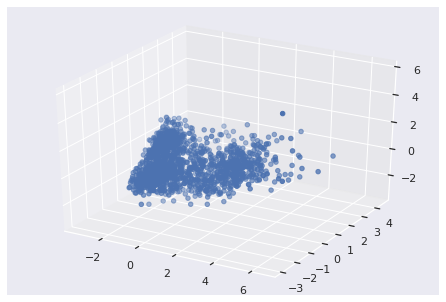

In [314]:
'''
# Graficar 2 Componentes
fig, ax = plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1], s=50)
'''

# Graficar 3 Componentes
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2])
plt.show()

#for i in range(0, len(X_pca)):
 # ax.annotate(train.iloc[i,:].name[0:2],(X_pca[i,0], X_pca[i,1]))

Una vez visualizamos nuestros datos en 3D procederemos a realizar clustering jerárquico.

### Clustering Jerárquico

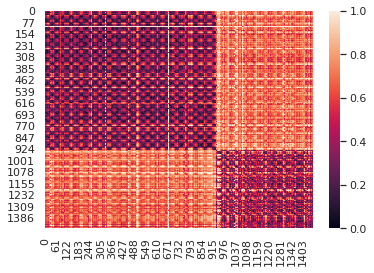

In [315]:
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(datanorm)

ax = sns.heatmap(matsim, vmin = 0, vmax = 1)

Obviamente no nos ayuda bastante debido a la cantidad de datos que hay pero no está de más visualizarla por si nos pudiese aportar cierta información.

#### Dendogramas

##### Complete

In [319]:
'''
clusters = cluster.hierarchy.linkage(matsim, method = 'complete')
cluster.hierarchy.dendrogram(clusters,labels = train.index, leaf_rotation=90)

f = plt.figure()
plt.show()
'''

"\nclusters = cluster.hierarchy.linkage(matsim, method = 'complete')\ncluster.hierarchy.dendrogram(clusters,labels = train.index, leaf_rotation=90)\n\nf = plt.figure()\nplt.show()\n"

##### Average

In [320]:
'''
clusters = cluster.hierarchy.linkage(matsim, method = 'average')
cluster.hierarchy.dendrogram(clusters,labels = train.index, leaf_rotation=90)

f = plt.figure()
plt.show()
'''

"\nclusters = cluster.hierarchy.linkage(matsim, method = 'average')\ncluster.hierarchy.dendrogram(clusters,labels = train.index, leaf_rotation=90)\n\nf = plt.figure()\nplt.show()\n"

##### Single

In [321]:
'''
clusters = cluster.hierarchy.linkage(matsim, method = 'single')
cluster.hierarchy.dendrogram(clusters,labels = train.index, leaf_rotation=90)

f = plt.figure()
plt.show()
'''

"\nclusters = cluster.hierarchy.linkage(matsim, method = 'single')\ncluster.hierarchy.dendrogram(clusters,labels = train.index, leaf_rotation=90)\n\nf = plt.figure()\nplt.show()\n"

##### Ward

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


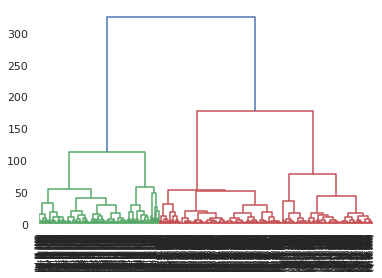

<Figure size 432x288 with 0 Axes>

In [322]:

clusters = cluster.hierarchy.linkage(matsim, method = 'ward')
cluster.hierarchy.dendrogram(clusters,labels = train.index, leaf_rotation=90)

f = plt.figure()
plt.show()


Tras probar con los 4 métodos (complete, single, ward y average) me he decantado por usar el método ward ya que ha sido con el que me ha parecido que he logrado obtener los mejores resultados, o más bien los resultados más esperados y lógicos a mi parecer.

Este es el dendograma que obtenemos con el método Ward y bueno, he considerado cortar por 100 ya que tras probar con diferentes cortes ha sido con el que he obtenido mejores resultados a la hora de poder clasificar los grupos posteriormente. Con este corte obtenemos 4 clusters y un coeficiente de Silhouette de 0.412.

In [323]:
cut = 100

labels = cluster.hierarchy.fcluster(clusters, cut, criterion = 'distance')

labels

array([4, 4, 3, ..., 1, 1, 1], dtype=int32)

In [324]:
# tratamos el cluster -1 como outliers

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(datanorm,labels))

Estimated number of clusters: 4
Silhouette Coefficient: 0.412


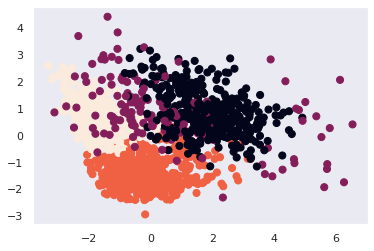

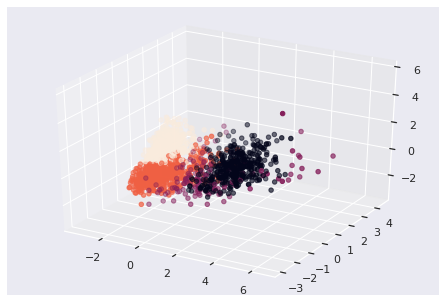

In [325]:

# Graficar 2 Componentes
fig, ax = plt.subplots()
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=50)

plt.grid()
plt.show()


# Graficar 3 Componentes
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels)
plt.grid()
plt.show()


#### Análisis de los grupos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


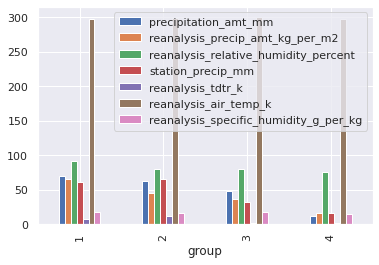

In [328]:
train2['group'] = labels

res = train2[['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'station_precip_mm','reanalysis_tdtr_k','reanalysis_air_temp_k','reanalysis_specific_humidity_g_per_kg', 'group']].groupby(('group')).mean()
res.plot(kind='bar', legend=True)

Como podemos observar, las últimas 2 variables digamos que no nos aportan información en este análisis ya que son prácticamente iguales en cada cluster. Por esto las eliminaremos para poder realizar un mejor análisis de los grupos.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


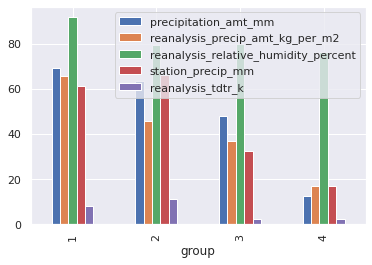

In [329]:
train2['group'] = labels

res = train2[['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'station_precip_mm','reanalysis_tdtr_k', 'group']].groupby(('group')).mean()
res.plot(kind='bar', legend=True)

**Descripción de las variables en DrivenData:**

- precipitation_amt_mm – Total precipitation

- reanalysis_precip_amt_kg_per_m2 – Total precipitation

- reanalysis_relative_humidity_percent – Mean relative humidity

- station_precip_mm – Total precipitation

- reanalysis_tdtr_k – Diurnal temperature range

Como podemos observar no es que se nos aporte mucha información sobre lo que significa cada variable pero a simple vista podemos observar que las 3 variables referidas a las precipitaciones son como 3 formas distintas de medir las precipitaciones,  otra es la media de la humedad relativa y la última la temperatura del día. Con todo esto intentaremos categorizar a cada grupo obtenido:

- **Grupo 1 y Grupo 2:** Son grupos muy parecidos, con unas altas precipitaciones y una temperatura diurna muy parecida.

- **Grupo 3:** Grupo con unas precipitaciones medias.

- **Grupo 4:** Grupo con unas precipitaciones bajas. 


### K-Means

In [0]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

Para seleccionar el número de clusters que vamos a obtener primero observaremos los valores de la distorsión y silhouette.

In [0]:
distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

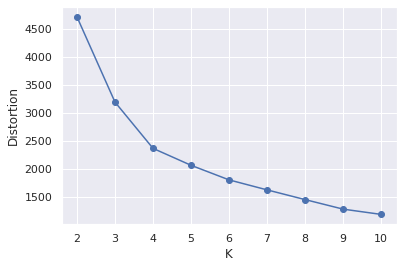

In [333]:
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

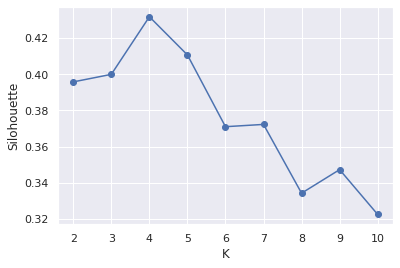

In [334]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

Ya que lo ideal es que la distorsión sea lo más baja posible y el silhouette lo más alto posible, seleccionaremos un valor de k = 4.

In [0]:
k = 4

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

In [336]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.392
Distortion: 2363.73


In [337]:
km.labels_

array([0, 0, 2, ..., 1, 1, 3], dtype=int32)

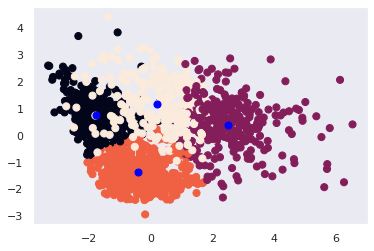

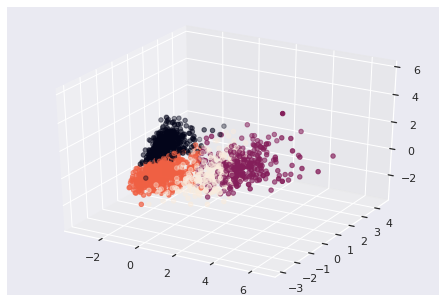

In [338]:
# Graficar 2 Componentes
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='blue',s=50)

plt.grid()
plt.show()


# Graficar 3 Componentes
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=km.labels_)
plt.grid()
plt.show()


De nuevo, me gusta observar la composición de los clusters utilizando 2D y 3D. Esta es la distribución de nuestros 4 clusters seleccionados y como hicimos anteriormente procederemos a intentar clasificarlos.

#### Análisis de los grupos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


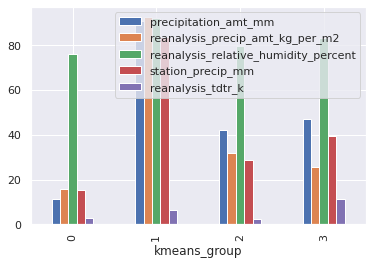

In [339]:
train2['kmeans_group'] = km.labels_


res = train2[['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'station_precip_mm', 'reanalysis_tdtr_k', 'kmeans_group']].groupby(('kmeans_group')).mean()
res.plot(kind='bar', legend=True)

- **Grupo 0:** Precipitaciones bajas.
- **Grupo 1:** Precipitaciones altas.
- **Grupo 2:** Precipitaciones medias y una temperatura diurna muy baja.
- **Grupo 3:** Precipitaciones medias y una temperatura diurna muy alta.


### DBSCAN

Finalmente he usado DBSCAN para la detección de outliers y debido a que tenemos un conjunto de datos de casi 1500 elementos no considero una zona densa de menos de 10 elementos, por lo que seleccionaremos un minPts de 10 y obtendremos la siguiente gráfica:

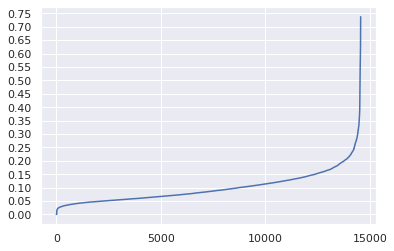

In [340]:
minPts=10
A = kneighbors_graph(datanorm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(datanorm):
    for j in range(len(datanorm)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 200000, 5000))
ax.set_yticks(np.arange(0, 2, 0.05))

plt.plot(seq)


plt.show()

Fijándonos en el codo de la gráfica, probaremos distintos grupos de clusters desde 0.1 a 0.35 con intervalos de 0.05.

In [341]:
for eps in np.arange(0.1, 0.35, 0.05):
  db = DBSCAN(eps, min_samples=minPts).fit(datanorm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print (eps, n_clusters_)
  
#labels

0.1 3
0.15000000000000002 2
0.20000000000000004 2
0.25000000000000006 2
0.30000000000000004 2


In [342]:
db = DBSCAN(eps=0.15, min_samples=minPts).fit(datanorm)
labels = db.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

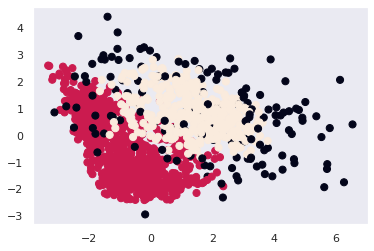

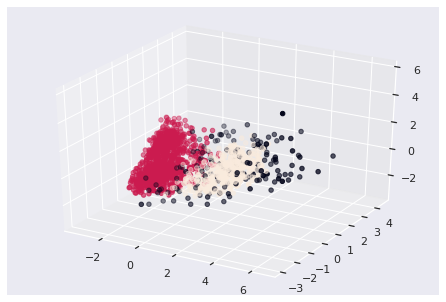

In [343]:

# Graficar 2 Componentes
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
plt.grid()
plt.show()


# Graficar 3 Componentes
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels)
plt.grid()
plt.show()


De esta manera podemos obtener estos outliers que hemos encontrado, los cuales serían:

In [344]:
train2['dbscan_group'] = labels

train2[train2['dbscan_group'] == -1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


precipitation_amt_mm  ...  dbscan_group
city weekofyear year                        ...              
sj   42         1990                143.55  ...            -1
     2          1992                200.85  ...            -1
     21         1992                 71.85  ...            -1
     22         1992                186.25  ...            -1
     21         1995                204.62  ...            -1
...                                    ...  ...           ...
iq   8          2010                 84.67  ...            -1
     11         2010                121.20  ...            -1
     12         2010                 51.29  ...            -1
     14         2010                 93.76  ...            -1
     22         2010                 86.47  ...            -1

[155 rows x 10 columns]

Hemos obtenido un total de 155 valores atípicos, aproximadamente el 10% del dataset.

# **4. Conclusiones**

Finalmente, tras todo el análisis de clustering me quedaría con el método K-Means debido a que he podido clasificar mejor los grupos y con el clustering jerárquico me ha costado bastante clasificar los grupos 1 y 2.

También me ha parecido interesante como con el análisis de características y posteriormente el clustering de los datos hemos observado que, a priori, las precipitaciones y la temperatura del día afectan en gran medida a la propagación del Dengue.